In [64]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [65]:
data_file=pd.read_csv("BostonHousing.csv")
data_file.isnull().sum()

crim       0
zn         0
indus      0
chas       0
nox        0
rm         0
age        0
dis        0
rad        0
tax        0
ptratio    0
b          0
lstat      0
medv       0
dtype: int64

In [66]:
data_file.head(2)

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat,medv
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.9,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.9,9.14,21.6


In [67]:
X=data_file[['rm','lstat']].values
y=data_file['medv'].values


In [68]:
def compute_loss(X,y,weight,bias):
    prediction=X*weight + bias
    loss=prediction - y.reshape(-1,1)
    return np.mean((loss)**2)

In [69]:
def gradient_descent(X_batch,y_batch,weight,bias,learning_rate):
    m = len(y_batch)
    predictions = X_batch @ weight + bias
    error = predictions - y_batch

    gradient_weight = (2/m)* np.sum(X_batch.T @ error)
    gradient_bias = (2/m) * np.sum(error)

    weight -= learning_rate * gradient_weight
    bias -= learning_rate * gradient_bias

    return weight, bias

In [70]:
def train_model(X,y,learning_rate=0.0001, batch_size=len(X), epochs=500):
    np.random.seed(42)
    weight = np.random.randn(2)*0.001
    bias = np.random.randn()*0.001
    loss_history =[]
    for epoch in range(epochs):
        indices  = np.random.permutation(len(y))
        X_shuffled = X[indices]
        y_shuffled = y[indices]
        for i in range(0,len(y),batch_size ):
            X_batch = X_shuffled[i:i+batch_size]
            y_batch = y_shuffled[i:i+batch_size]
            weight, bias = gradient_descent(X_batch, y_batch,weight,bias, learning_rate)
        loss = compute_loss(X,y,weight,bias)
        loss_history.append(loss)
    return loss_history

print(len(X))

506


In [86]:
loss_low_lr=train_model(X,y,learning_rate=0.0001, batch_size=len(X), epochs=500)
# loss_medium_lr=train_model(X,y,learning_rate=0.001, batch_size=len(X), epochs=500)
# loss_high_lr=train_model(X,y,learning_rate=0.01, batch_size=len(X), epochs=500)

In [87]:
loss_low_lr

[np.float64(563.3044251990599),
 np.float64(538.1673280869277),
 np.float64(516.1689805840865),
 np.float64(496.8836086397548),
 np.float64(479.9465746626772),
 np.float64(465.0452854947242),
 np.float64(451.91147999504267),
 np.float64(440.3146845703248),
 np.float64(430.0566576537703),
 np.float64(420.9666717448856),
 np.float64(412.89750495866855),
 np.float64(405.72203375851285),
 np.float64(399.3303352220589),
 np.float64(393.6272212860766),
 np.float64(388.530139334794),
 np.float64(383.96738357339115),
 np.float64(379.8765701498121),
 np.float64(376.20333619454874),
 np.float64(372.9002290431612),
 np.float64(369.92575706202393),
 np.float64(367.243577859455),
 np.float64(364.82180335479245),
 np.float64(362.63240430089775),
 np.float64(360.65069949868393),
 np.float64(358.85491717968307),
 np.float64(357.22581792702),
 np.float64(355.74637010937136),
 np.float64(354.4014701612992),
 np.float64(353.177701194573),
 np.float64(352.0631244006986),
 np.float64(351.04709853187245),
 

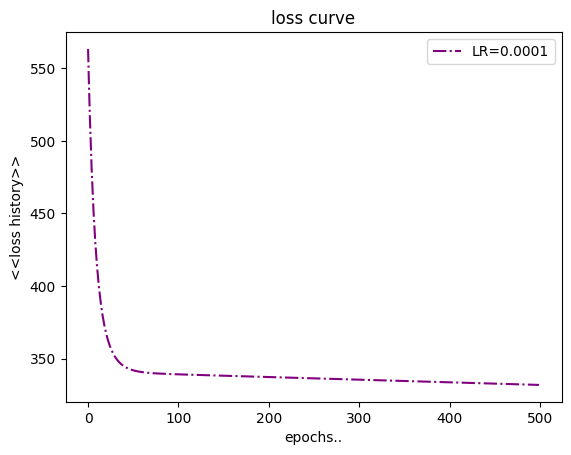

In [88]:
plt.plot(loss_low_lr,label='LR=0.0001',color='purple',linestyle='-.')
plt.title('loss curve')
plt.xlabel('epochs..')
plt.ylabel('<<loss history>>')
plt.legend()
plt.show()

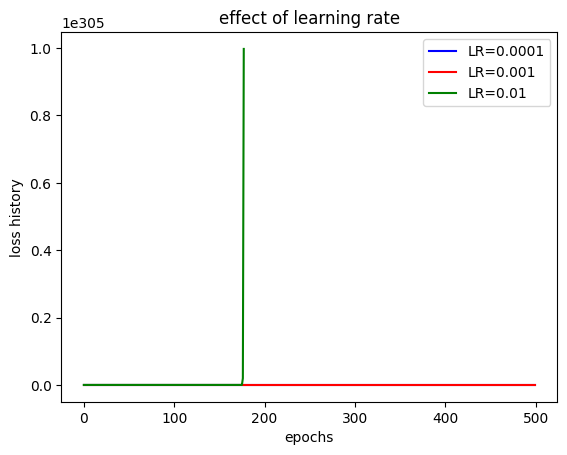

In [74]:
plt.plot(loss_low_lr,label='LR=0.0001',color='blue')
plt.plot(loss_medium_lr,label='LR=0.001',color='red')
plt.plot(loss_high_lr,label='LR=0.01',color='green')
plt.title('effect of learning rate')
plt.xlabel('epochs')
plt.ylabel('loss history')
plt.legend()
plt.show()